In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers
from scipy.stats import zscore

In [2]:
#Import Fraud_Loan_Prediction.csv file
df=pd.read_csv('Fraud_Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:
    1. Missing value in many features.
    2. 614 row with 13 columns in this dataset.
    3. Loan ID is a unique identifier and can be removed
    3. All datatype of features correct with the data value of feature.
    5. Don't seem to have any null values for Property_Area, Loan_Status, Income, Education and Loan ID.

### Handling Missing Data

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Imputing missing value for gender
# Finding the most appeard value in gender columns

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Gender'].fillna('Male',inplace=True)

In [10]:
# Imputing missing value for Married
# Finding the most appeard value in Married columns

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Married'].fillna('Yes',inplace=True)

In [12]:
# Imputing missing value for dependents
# Finding the most appeard value in dependents columns

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Dependents'].fillna('0',inplace=True)

In [14]:
# Imputing missing value for self_emplyed
# Finding the most appeard value in self_employed columns

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Self_Employed'].fillna('No',inplace=True)

In [16]:
# Imputing missing values for loanAmount
# Strategy -mean

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [17]:
# Imputing missing values for Loan_Amount_Term
# Strategy -mean

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [18]:
# Imputing missing values for Credit_History
# Strategy -mean

df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

### Check missing value

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

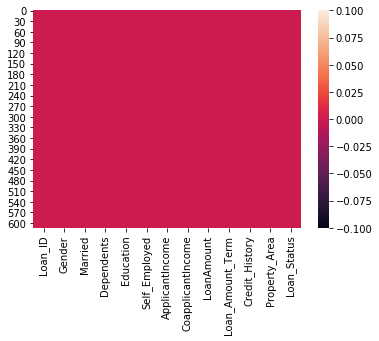

In [20]:
sns.heatmap(df.isnull())
plt.show()

## Summary Statistics of Numerical Variable

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation:
    1. Mean is greater than 50% or eual to 50% means all numerical features are right skewd.
    2. LoanAmount min value 9 and max 700.
    3. difference between 75% and max very large in ApplicantIncome according to dtandard deviation means oultiers present.
    

In [22]:
#check coorelation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


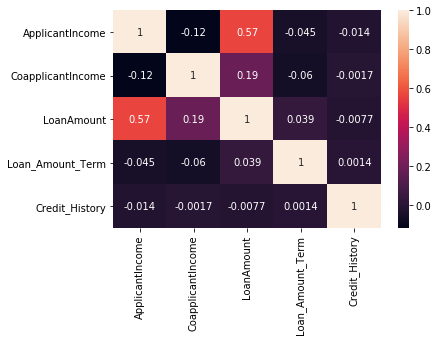

In [23]:
sns.heatmap(df.corr(),cmap='rocket',annot=True)

Observation:
    1. Loan amount negatively correlated with only credit History.
    2. credit_History positive correlated with Loan_Amount_Term.
    3. LoanAmount is higly positive coorelated with AplicantIncome.

## Data Visualization

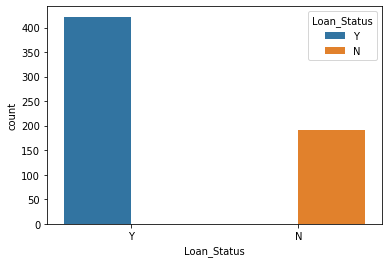

In [24]:
sns.countplot(x='Loan_Status',data=df,hue='Loan_Status')

Finding: Present data set approved loan is more than not approved.

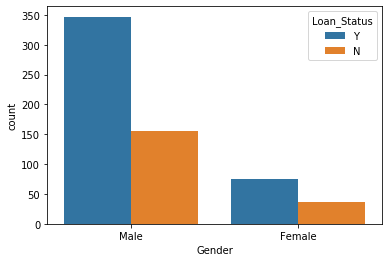

In [25]:
sns.countplot(x='Gender', data=df,hue='Loan_Status')

Observation:
    1. % of loan approved for male candidate is more than female

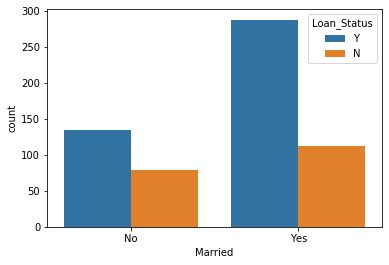

In [26]:
sns.countplot(x='Married', data=df,hue='Loan_Status')

Finding:
    1. Apply for loan married person is more than unmarried.
    3. % of Approvel of loan for married person is more than unmarried person.

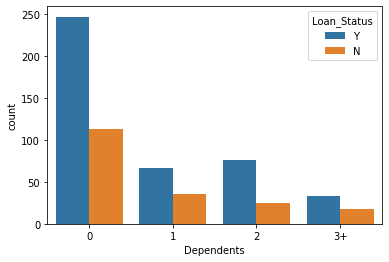

In [27]:
sns.countplot(x='Dependents', data=df,hue='Loan_Status')

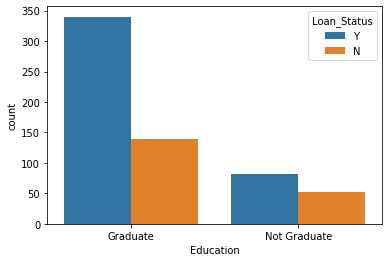

In [28]:
sns.countplot(x='Education', data=df,hue='Loan_Status')

Finding:
    1. Graduate person apply for loan is more than Not graduate
    3. % of approvel of loan for graduate more than 50 % according to total apply for loan.

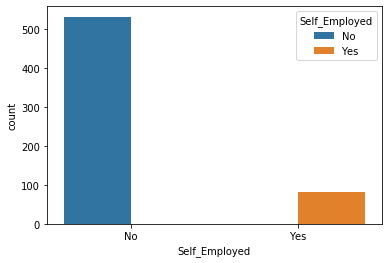

In [29]:
sns.countplot(x='Self_Employed', data=df,hue='Self_Employed')

Finding: in present dataset self empolyed number less than 100.

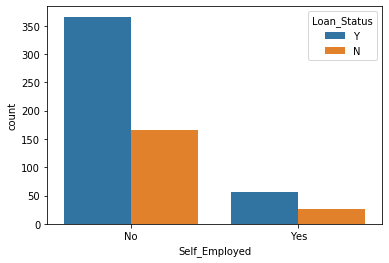

In [30]:
sns.countplot(x='Self_Employed', data=df,hue='Loan_Status')

Observation:
    1. Self_Employed person apply for loan very less tha employed person.
    2. Approvel of loan for employed person more than 50 %

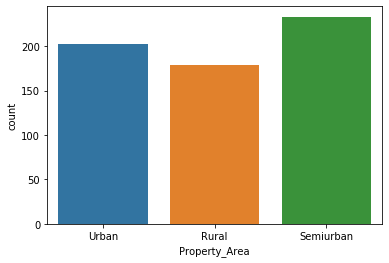

In [31]:
sns.countplot(x='Property_Area', data=df)

Finding:
    1. Semiurban area appy for loan is maximum in this dataset.
    2. Apply for loan in rural area minimum in this dataset.
    3. Difference betrween the apply for loan in different propery area is not more mean data balace according to area of property.

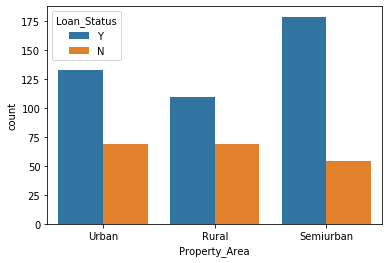

In [32]:
sns.countplot(x='Property_Area', data=df,hue='Loan_Status')

Observation:
    1. % of approvel loan for urban and semiurban area is better and % of approvelloan in rural area aslo good.

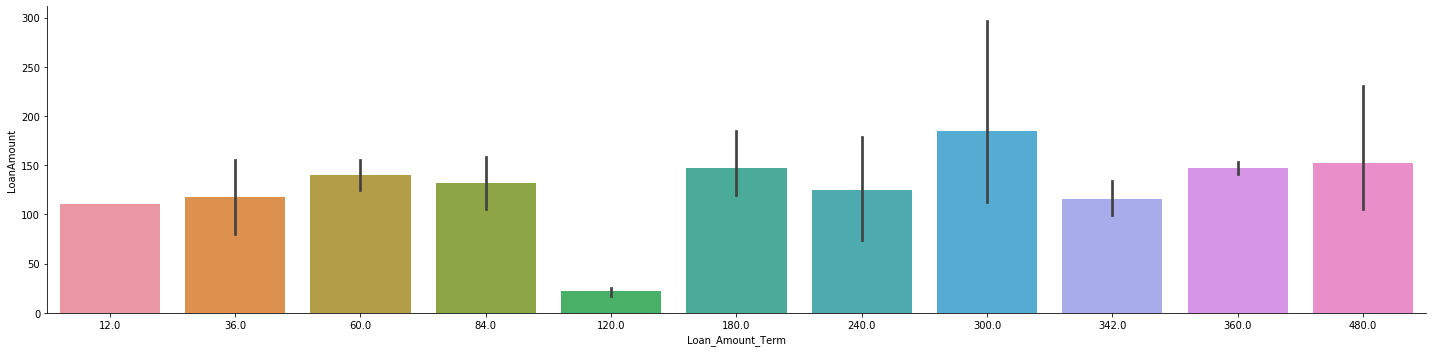

In [33]:
sns.catplot(x='Loan_Amount_Term',y='LoanAmount',data=df,kind='bar',aspect=4)
plt.show()

## Data Visualization of numeric value feature.

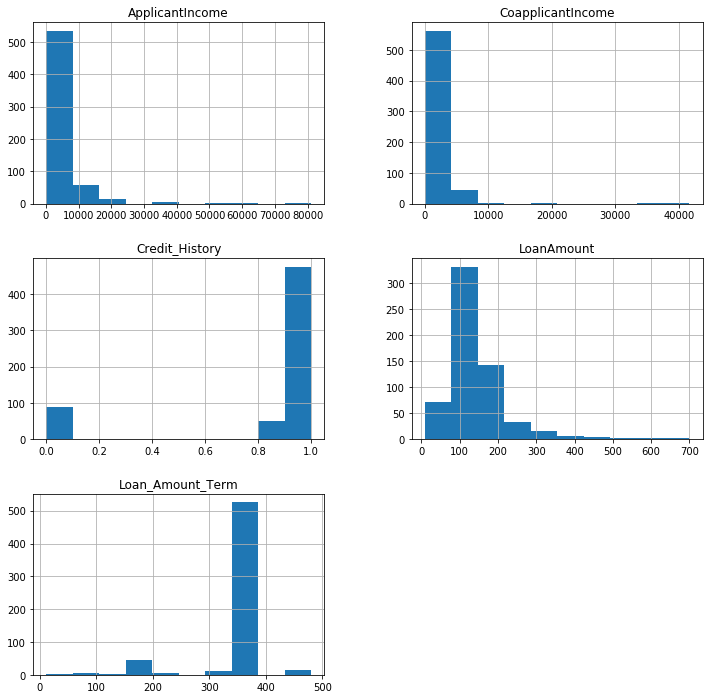

In [34]:
df.hist(figsize=(12,12))
plt.show()

Observation:
    1. Maximum ApplicantIncome less than 10000 more than 10000 seems like outliers
    2. Maximum CoapplicantIncome less than 10000 seems like outliers.
    

In [35]:
(df['CoapplicantIncome']>10000).value_counts()

False    608
True       6
Name: CoapplicantIncome, dtype: int64

In [36]:
(df['ApplicantIncome']>10000).value_counts()

False    562
True      52
Name: ApplicantIncome, dtype: int64

In [37]:
(df['LoanAmount']>300).value_counts()

False    585
True      29
Name: LoanAmount, dtype: int64

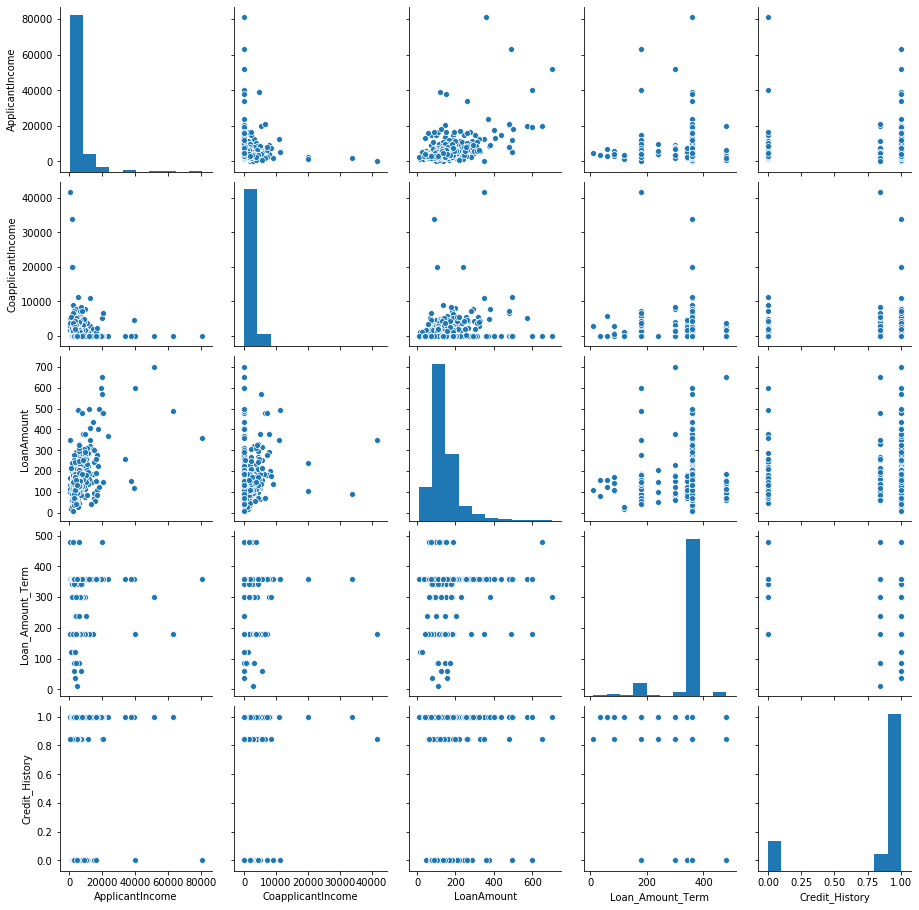

In [38]:
sns.pairplot(df)

## Check Skewness

In [39]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [40]:
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.log1p(df[col])    
    

In [41]:
#after removing skewness again check
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -4.800667
Credit_History      -1.988196
dtype: float64

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y


In [43]:
# Drop Loan_ID coumns its not contribute the outcome feature Loan_status
df.drop(columns=['Loan_ID'], axis=1, inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Plooting outliers

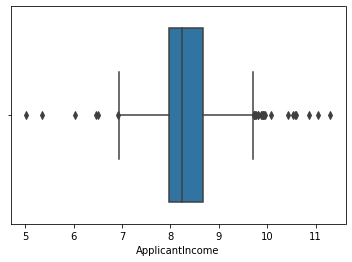

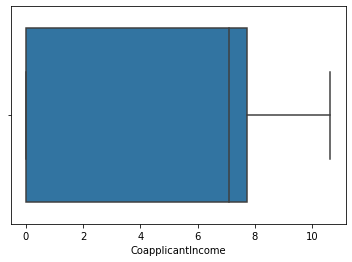

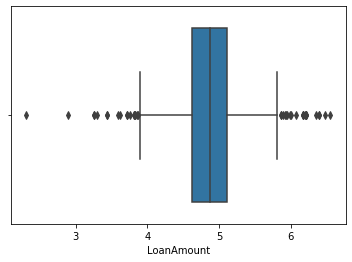

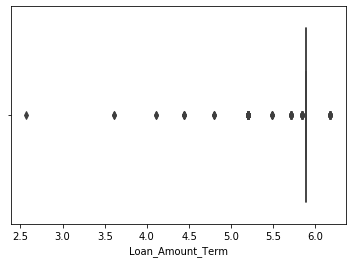

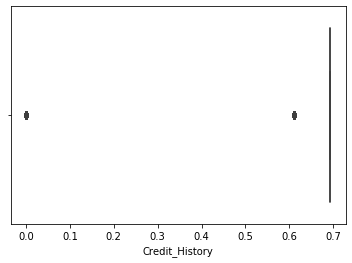

In [44]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [45]:
#seprate the categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
num_df >>> 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Removing Outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[0.51618627, 1.10778298, 0.2492193 , 0.26994076, 0.44228868],
       [0.13780585, 0.78215757, 0.02252523, 0.26994076, 0.44228868],
       [0.51947937, 1.10778298, 1.35684624, 0.26994076, 0.44228868],
       ...,
       [1.01592074, 0.30848337, 1.3574234 , 0.26994076, 0.44228868],
       [0.91897195, 1.10778298, 0.74457835, 0.26994076, 0.44228868],
       [0.13780585, 1.10778298, 0.0549274 , 0.26994076, 2.41844385]])

In [47]:
#consider threshold = 3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([2, 3, 3, 2, 3, 2, 2, 3, 0, 2, 0, 2, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0,
       0, 3, 3, 3, 2, 2, 2, 3, 3, 0], dtype=int64))


In [48]:
df=df[(z<3).all(axis=1)]

In [49]:
df.shape

(587, 12)

In [50]:
# Splitting x and y
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
y.replace({'N':0,'Y':1},inplace=True)

In [51]:
x=pd.get_dummies(x)
x.shape

(587, 20)

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
print(x_train.shape,x_test.shape)

(469, 20) (118, 20)


In [55]:
print(y_train.shape,y_test.shape)

(469,) (118,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [57]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [58]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 11}

In [59]:
KNN=KNeighborsClassifier(n_neighbors=11)

In [60]:
#Support Vector Classifier
from sklearn.svm import SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'linear'}

In [61]:
SV=SVC(kernel='linear',C=1)

In [62]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'gini'}

In [63]:
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)

In [64]:
#Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [65]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [66]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [67]:
#Extra Trees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [68]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [69]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [70]:
KNN=KNeighborsClassifier(n_neighbors=11)
SV=SVC(kernel='linear',C=1)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state=42)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [71]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ KNeighborsClassifier **********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Accuracy_score= 0.6694915254237288


Cross_Val_Score= 0.7426943308007014


roc_auc_score= 0.5357142857142857


classification_report
               precision    recall  f1-score   support

           0       1.00      0.07      0.13        42
           1       0.66      1.00      0.80        76

    accuracy                           0.67       118
   macro avg       0.83      0.54      0.46       118
weighted avg       0.78      0.67      0.56       118



[[ 3 39]
 [ 0 76]]





************ SVC **********


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=Fa

Cross_Val_Score= 0.7888661601402689


roc_auc_score= 0.706453634085213


classification_report
               precision    recall  f1-score   support

           0       0.86      0.45      0.59        42
           1       0.76      0.96      0.85        76

    accuracy                           0.78       118
   macro avg       0.81      0.71      0.72       118
weighted avg       0.80      0.78      0.76       118



[[19 23]
 [ 3 73]]







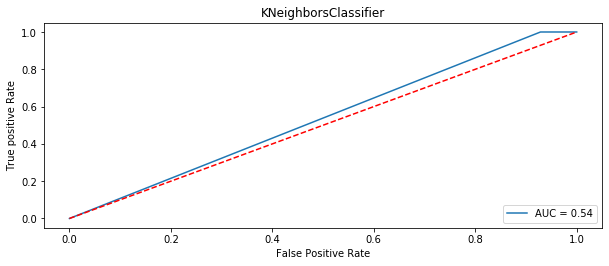

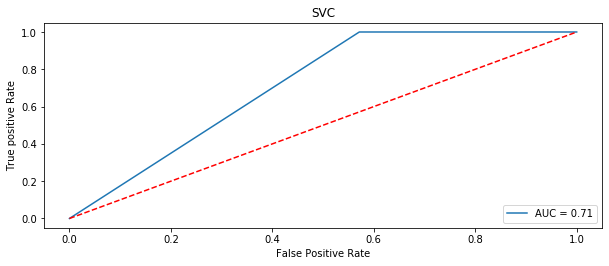

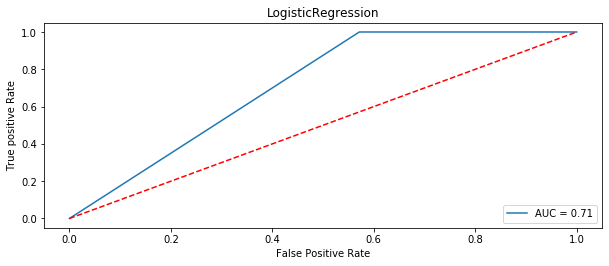

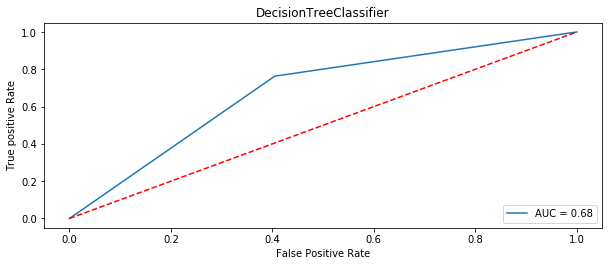

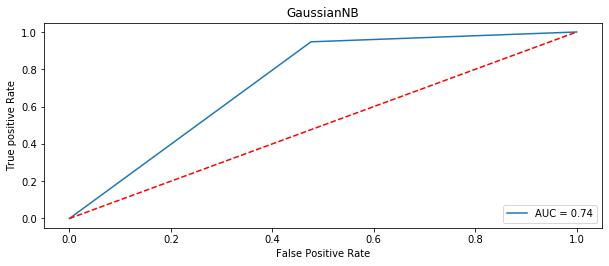

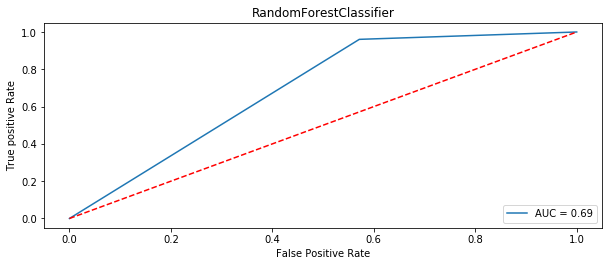

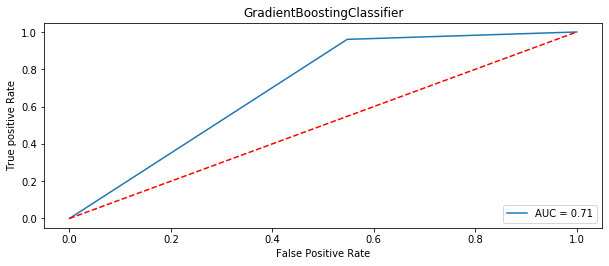

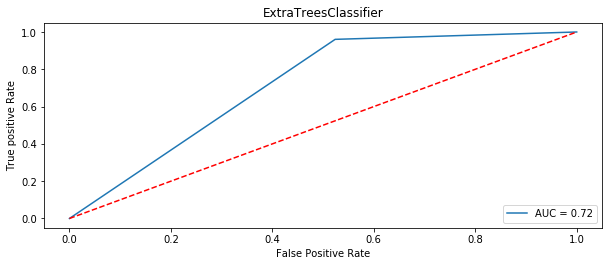

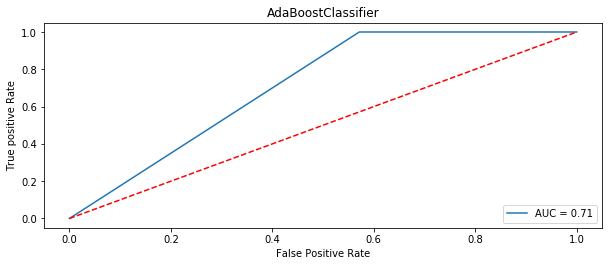

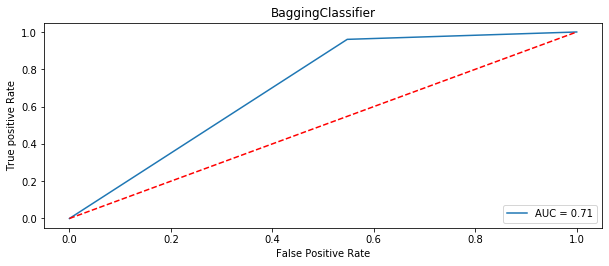

In [73]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [74]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,66.949153,74.269433,53.571429
1,SVC,79.661017,81.613092,71.428571
2,LogisticRegression,79.661017,81.271186,71.428571
3,DecisionTreeClassifier,70.338983,71.218586,67.919799
4,GaussianNB,79.661017,79.053185,73.558897
5,RandomForestClassifier,77.118644,79.383402,69.454887
6,GradientBoostingClassifier,77.966102,75.464641,70.645363
7,ExtraTreesClassifier,78.813559,75.637054,71.835840
8,AdaBoostClassifier,79.661017,78.722969,71.428571
9,BaggingClassifier,77.966102,78.886616,70.645363


In [75]:
#save best model

import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(SVC,'SVC_Heart _Disease.pkl')

['SVC_Heart _Disease.pkl']